In [202]:
import os, sys
import numpy as np
import networkx as nx
import collections
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [203]:
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
  !wget https://s3.amazonaws.com/connectome-graphs/worm/c.elegans_neural.male_1.graphml


file = 'c.elegans_neural.male_1.graphml'

graph = nx.read_graphml(file)
# graph = nx.read_graphml('mixed.species_brain_1.graphml')
M = nx.to_numpy_matrix(graph)
print(M.shape)

(272, 272)


In [142]:
def network_portrait(G, trim_lengths=True, trim_numbers=False):
    # a = nx.algorithms.shortest_path_length(G)
    # all_pairs_shortest_path_length
    # all_pairs_dijkstra_path_length
    # all_pairs_bellman_ford_path_length
    lengths = dict(nx.all_pairs_shortest_path_length(G))
    
    # B_{ℓ,k} ≡ the number of nodes who have k nodes at distance ℓ
    res = np.zeros((G.number_of_nodes(), G.number_of_nodes()), dtype=np.int32)
    # print(lengths)
    for key, data in lengths.items():
        # print(key, data.values())
        # print(key, collections.Counter(data.values()))
        counters = collections.Counter(data.values())
        
        for dist in counters:
            if dist == 0:
                continue
            res[dist, counters[dist]] += 1
        # data.values()
        # print(data.values())
        
    if trim_lengths:
        res = res[~np.all(res == 0, axis=1)]
    # res = network_portrait(graph)
    # res = res[~np.all(res == 0, axis=0)]
    if trim_numbers:
        emptys = np.all(res == 0, axis=0)
        i = 0
        for e in emptys[::-1]:
            if not e:
                break
            i += 1

        res = res[:, :-i]
        
    return res
    

In [143]:
res = network_portrait(graph)

print(res)
# plt.imshow(res, 'gray', origin='lower', interpolation='none')


[[ 0 16 12 ...  0  0  0]
 [ 0  0  3 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  2  5 ...  0  0  0]
 [ 0  2  1 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]]


In [247]:
# if max_x is True, then max_x + 10
def draw_portraits(portraits, labels, max_x=None, high_resolution=False, savefile=None):
    if max_x is True:
        max_length_x = max([port.shape[1] for port in portraits]) + 10
        print(max_length_x)
        
        for i, port in enumerate(portraits):
            portraits[i] = np.pad(port, [(0, 0), (0, max_length_x - port.shape[1])])
    elif isinstance(max_x, int):
        for i, port in enumerate(portraits):
            portraits[i] = port[:, :max_x]
    
    if high_resolution:
        fig, ax = plt.subplots(len(portraits), figsize=(40, len(portraits) * 8))
    else:
        fig, ax = plt.subplots(len(portraits), figsize=(20, len(portraits) * 3))
        
    for i, port in enumerate(portraits):
        # ax.set_title(port)
        port_ = port + 1
        # ax[i].set_title(f'WS N = {N} K = {K} p = {range_p[i]:.2f}')
        ax[i].set_title(labels[i], fontsize=20)
        ax[i].pcolormesh(port_, norm=colors.LogNorm(vmin=port_.min(), vmax=port_.max()))

    if savefile:
        fig.savefig(savefile)
    
    plt.show()

In [248]:
# last parameter doesn t work yet
def ws_portraits(N, K, P, max_x=None, high_resolution=False, savefile=None):# cut_max_length=True):
    graphs = []
    portraits = []
    labels = []
    
    if isinstance(N, int):
        N = [N]
    
    if isinstance(K, int):
        K = [K]
        
    if isinstance(P, (int, float)):
        P = [P]
    
    for n in N:
        for k in K:
            for p in P:
                graphs.append(nx.watts_strogatz_graph(n, k, p))
                portraits.append(network_portrait(graphs[-1],  trim_numbers=True))
                labels.append(f'WS N = {n} K = {k} p = {p:.2f}')
    
    draw_portraits(portraits, labels, savefile=savefile, high_resolution=True, max_x=max_x)
    

237


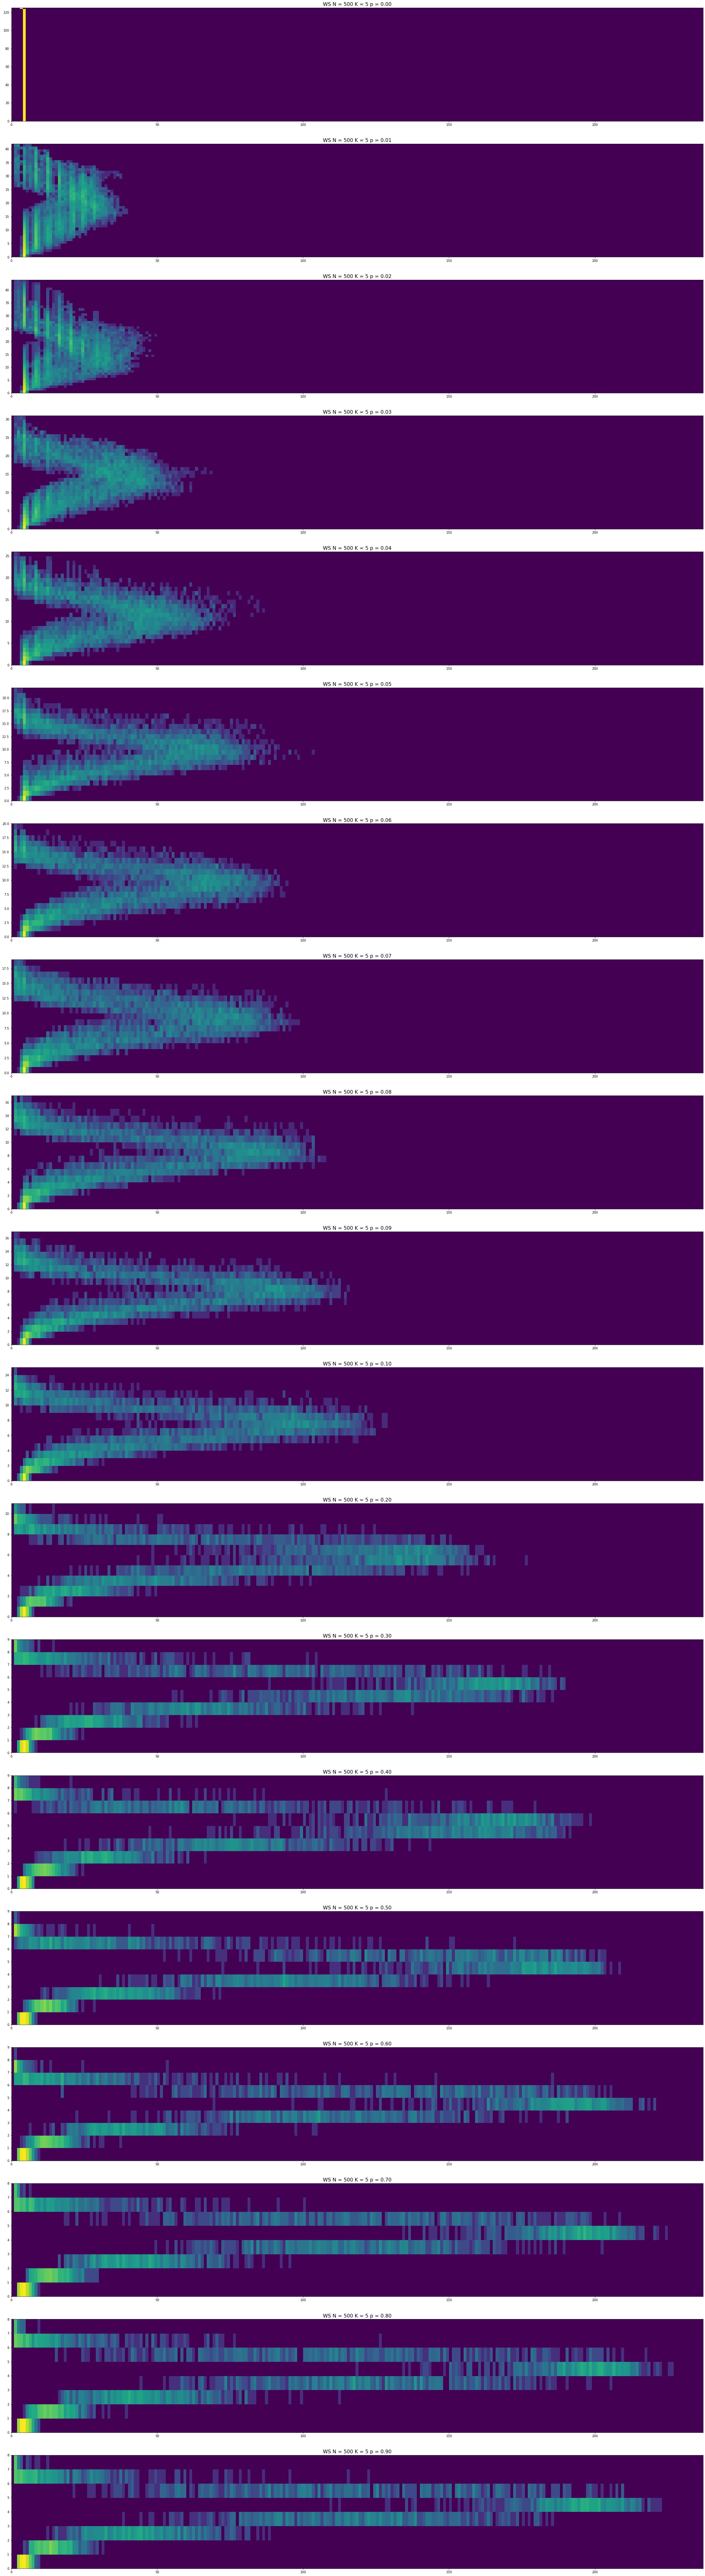

In [244]:
ran = np.concatenate([np.arange(0.0, 0.1, 0.01), np.arange(0.1, 1.0, 0.1)])

ws_portraits(500, 5, ran, high_resolution=True, max_x=True)

True
405


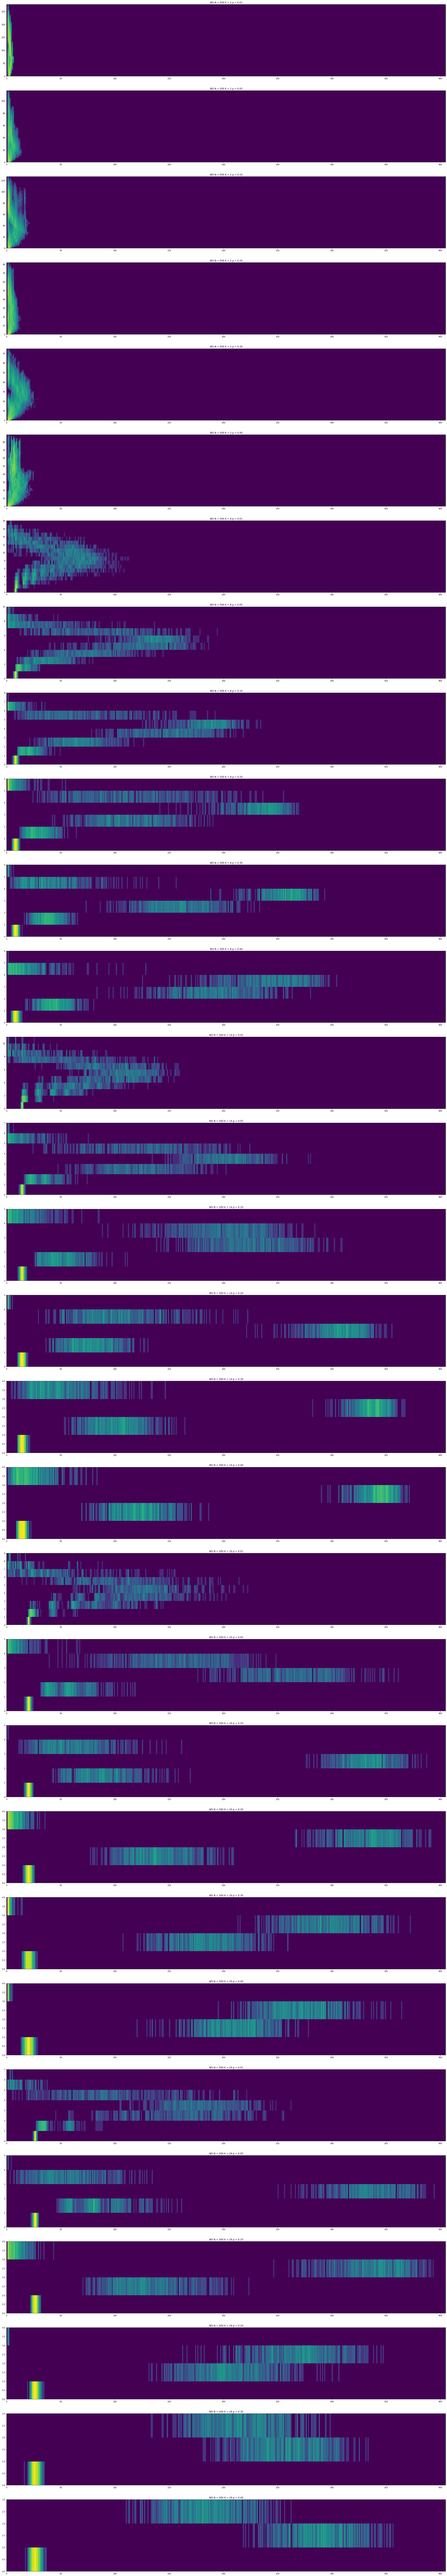

In [235]:
ws_portraits(500, np.arange(2, 30, 6), np.array([0.01, 0.05, 0.1, 0.2, 0.3, 0.4]), max_x=True, high_resolution=False)

In [249]:
# last parameter doesn t work yet
def ba_portraits(N, M, savefile=None, max_x=None, high_resolution=False):# cut_max_length=True):    
    graphs = []
    portraits = []
    labels = []
    
    if isinstance(N, int):
        N = [N]
    
    if isinstance(M, int):
        M = [M]

    
    for n in N:
        for m in M:
            graphs.append(nx.barabasi_albert_graph(n, m))
            portraits.append(network_portrait(graphs[-1],  trim_numbers=True))
            labels.append(f'BA N = {n} M = {m}')
    
    draw_portraits(portraits, labels, savefile=savefile, high_resolution=True, max_x=max_x)

465


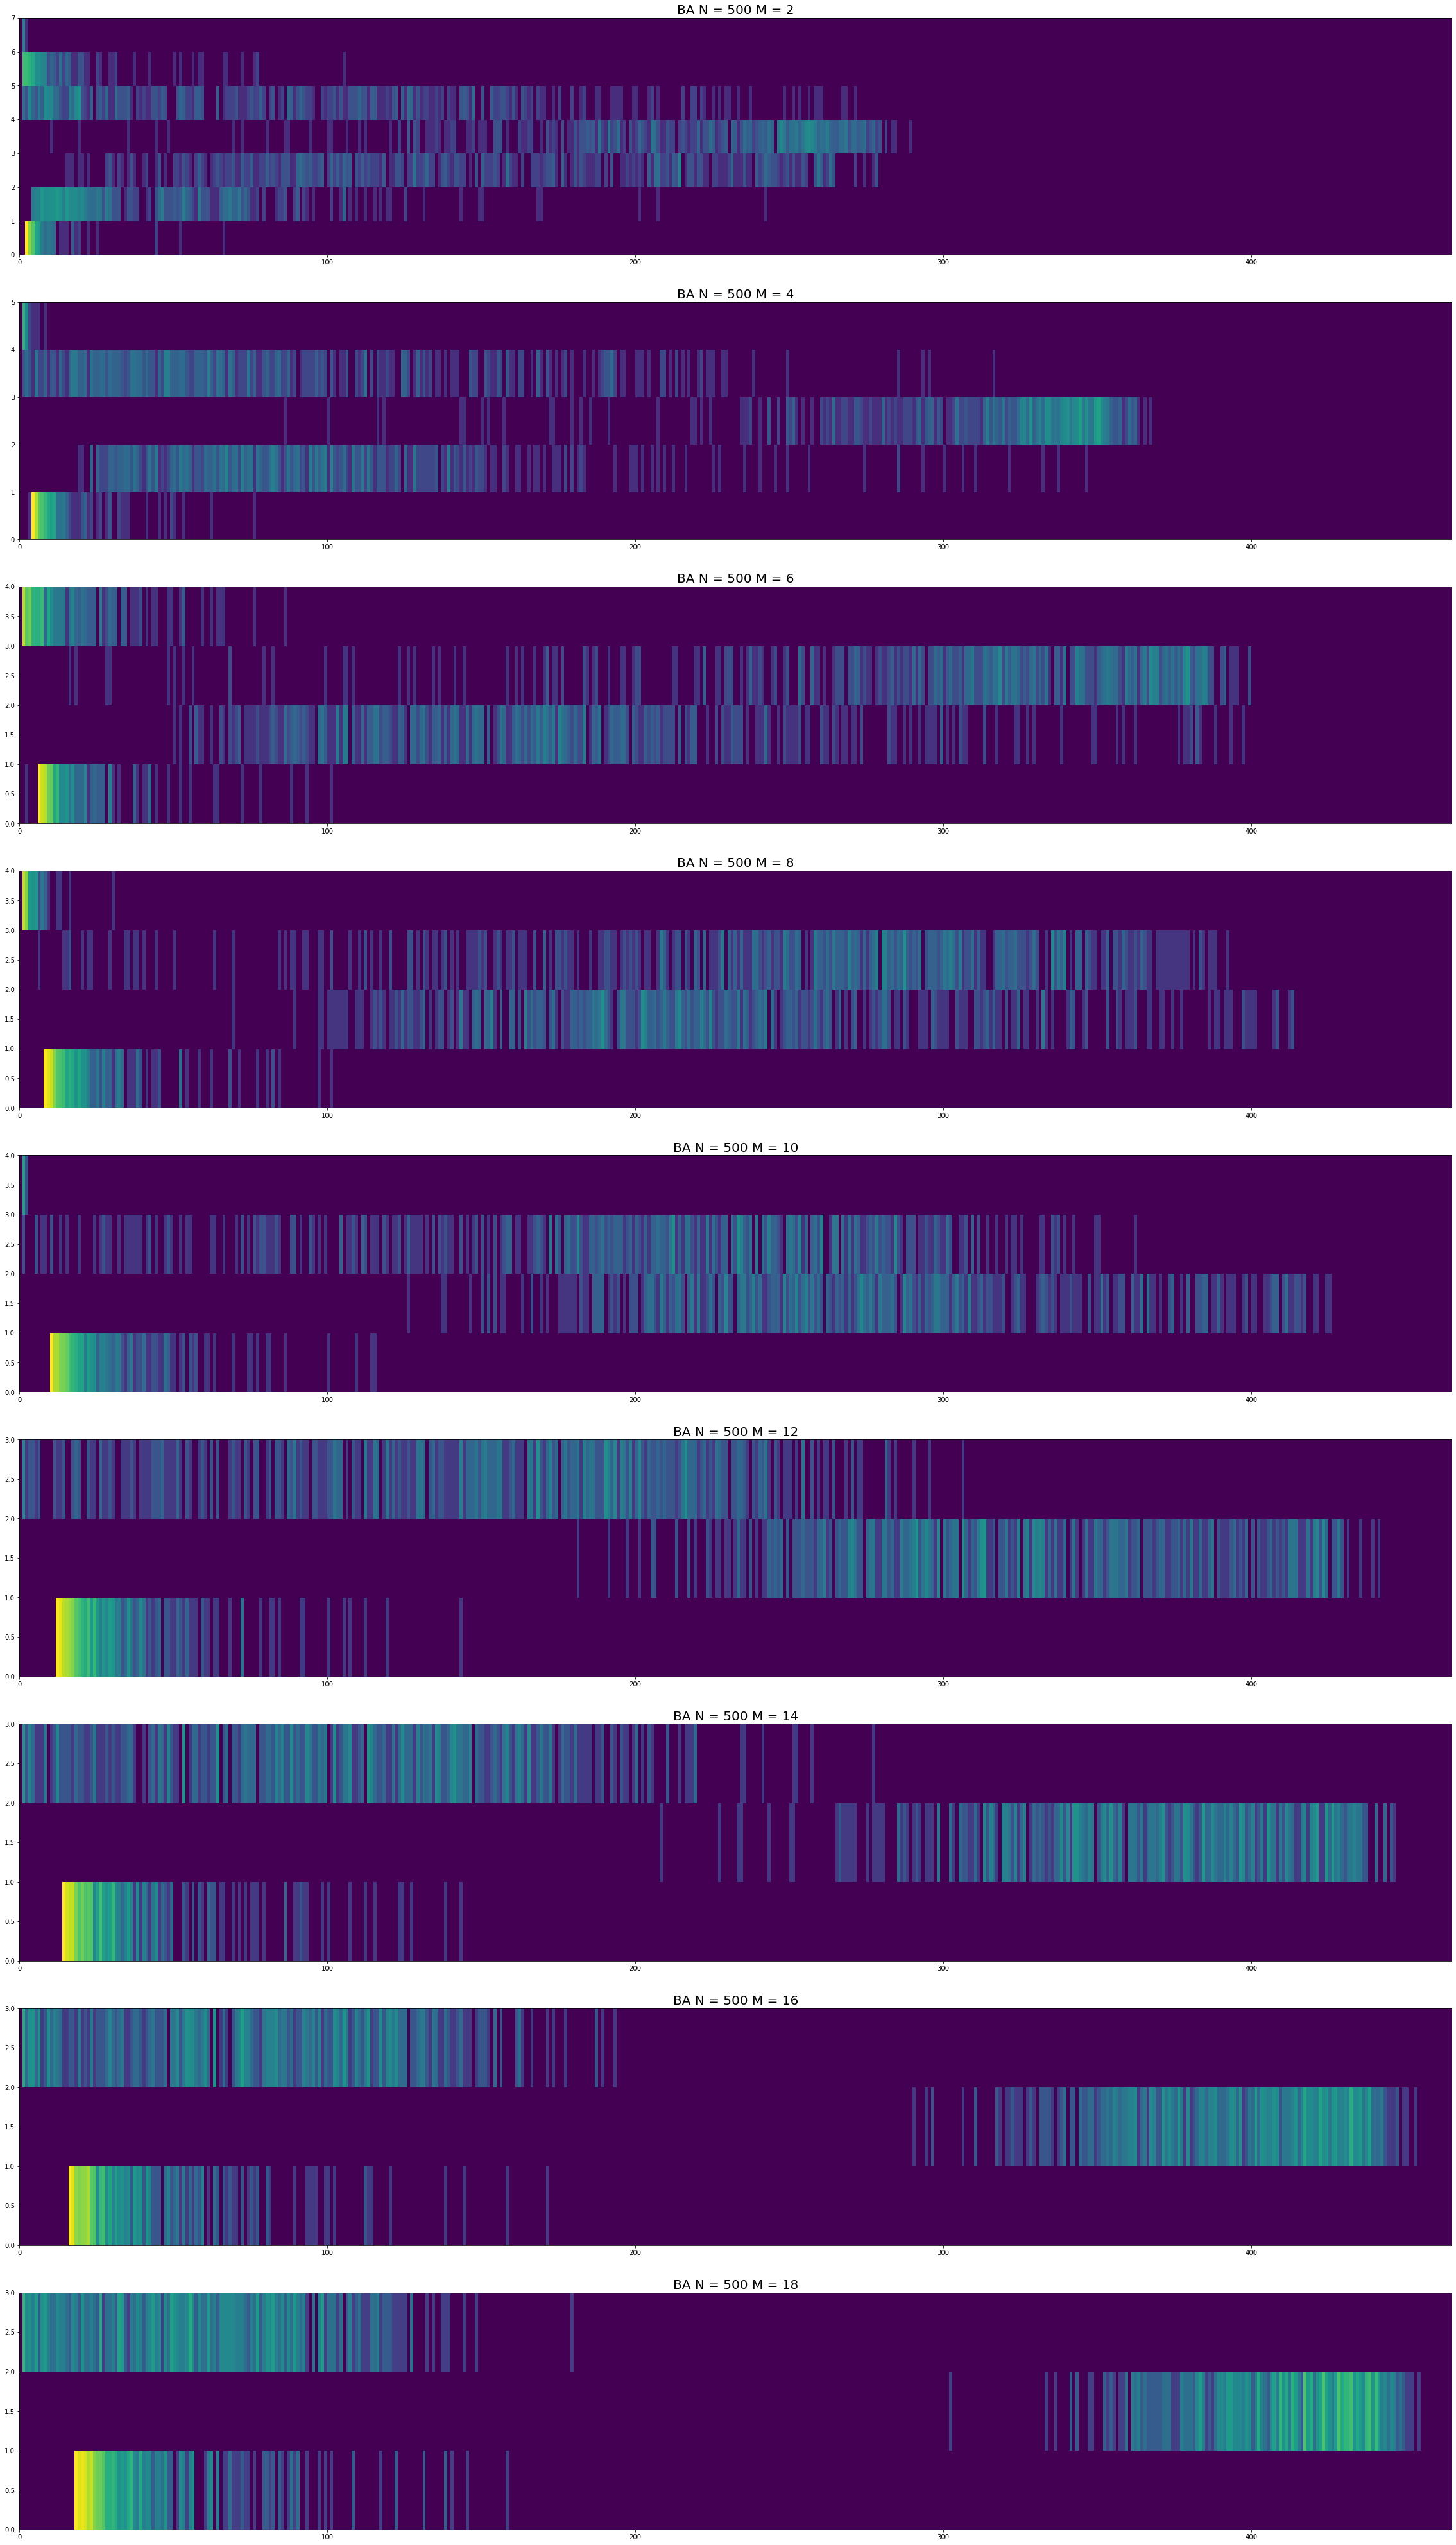

In [250]:
ba_portraits(500, np.arange(2, 20, 2), max_x=True, high_resolution=False, savefile='bas')

In [251]:
# D-degreee
def rrg_portraits(N, D, savefile=None, max_x=None, high_resolution=False):# cut_max_length=True):    
    graphs = []
    portraits = []
    labels = []
    
    if isinstance(N, int):
        N = [N]
    
    if isinstance(D, int):
        D = [D]

    
    for n in N:
        for d in D:
            graphs.append(nx.random_regular_graph(d, n))
            portraits.append(network_portrait(graphs[-1],  trim_numbers=True))
            labels.append(f'RRG N = {n} D = {d}')
    
    draw_portraits(portraits, labels, savefile=savefile, high_resolution=True, max_x=max_x)

375


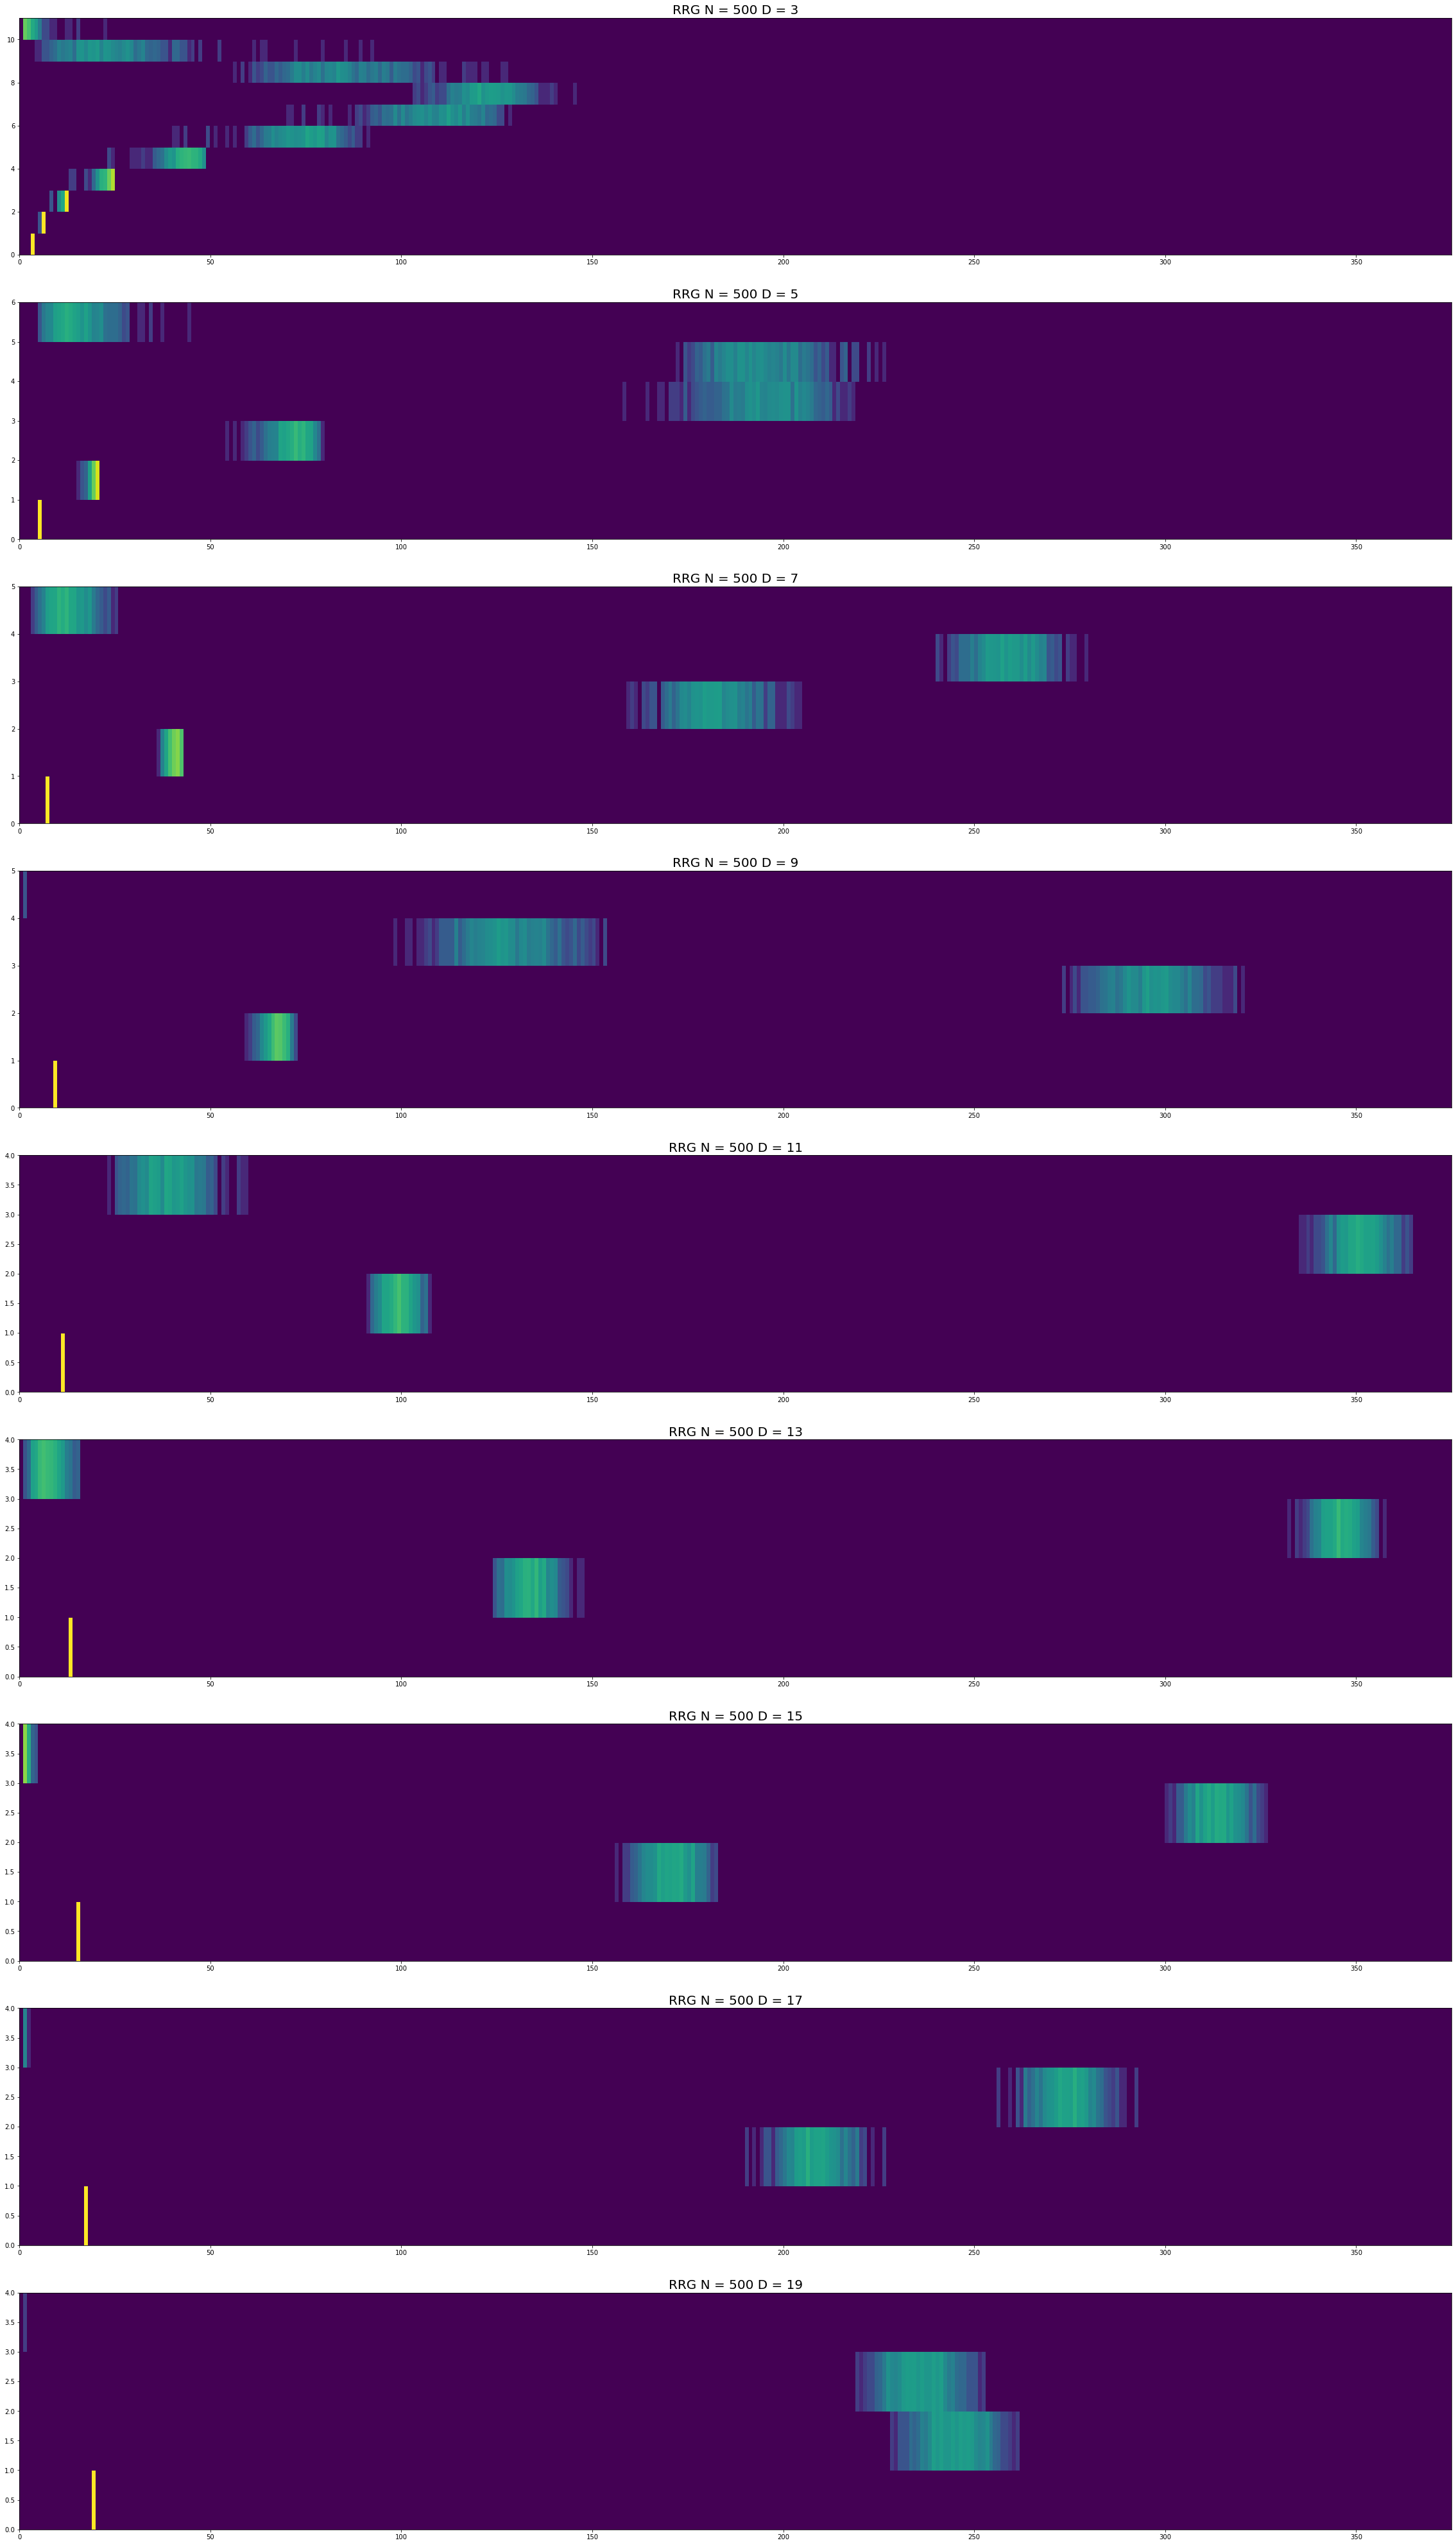

In [252]:
rrg_portraits(500, np.arange(3, 20, 2), max_x=True, high_resolution=False, savefile='rrg')